In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

In [42]:
data = pd.read_csv('credit_risk_dataset.csv')
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [44]:
print(data.isnull().sum())

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


In [45]:
mean_interest= data.groupby('loan_grade')['loan_int_rate'].mean()
mean_interest

loan_grade
A     7.327651
B    10.995555
C    13.463542
D    15.361448
E    17.009455
F    18.609159
G    20.251525
Name: loan_int_rate, dtype: float64

In [46]:
data['loan_int_rate']=data['loan_int_rate'].fillna(data['loan_grade'].map(mean_interest))

In [47]:
print(data.isnull().sum())

person_age                      0
person_income                   0
person_home_ownership           0
person_emp_length             895
loan_intent                     0
loan_grade                      0
loan_amnt                       0
loan_int_rate                   0
loan_status                     0
loan_percent_income             0
cb_person_default_on_file       0
cb_person_cred_hist_length      0
dtype: int64


In [48]:
data = data.dropna()

In [49]:
print(data.isnull().sum())

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31686 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  31686 non-null  int64  
 1   person_income               31686 non-null  int64  
 2   person_home_ownership       31686 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 31686 non-null  object 
 5   loan_grade                  31686 non-null  object 
 6   loan_amnt                   31686 non-null  int64  
 7   loan_int_rate               31686 non-null  float64
 8   loan_status                 31686 non-null  int64  
 9   loan_percent_income         31686 non-null  float64
 10  cb_person_default_on_file   31686 non-null  object 
 11  cb_person_cred_hist_length  31686 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.1+ MB


In [51]:
data = data.drop('loan_intent',axis=1)

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31686 entries, 0 to 32580
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  31686 non-null  int64  
 1   person_income               31686 non-null  int64  
 2   person_home_ownership       31686 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_grade                  31686 non-null  object 
 5   loan_amnt                   31686 non-null  int64  
 6   loan_int_rate               31686 non-null  float64
 7   loan_status                 31686 non-null  int64  
 8   loan_percent_income         31686 non-null  float64
 9   cb_person_default_on_file   31686 non-null  object 
 10  cb_person_cred_hist_length  31686 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 2.9+ MB


In [53]:
label_encoder = LabelEncoder()

for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = label_encoder.fit_transform(data[col])
        
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,3,123.0,3,35000,16.02,1,0.59,1,3
1,21,9600,2,5.0,1,1000,11.14,0,0.10,0,2
2,25,9600,0,1.0,2,5500,12.87,1,0.57,0,3
3,23,65500,3,4.0,2,35000,15.23,1,0.53,0,2
4,24,54400,3,8.0,2,35000,14.27,1,0.55,1,4


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31686 entries, 0 to 32580
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  31686 non-null  int64  
 1   person_income               31686 non-null  int64  
 2   person_home_ownership       31686 non-null  int32  
 3   person_emp_length           31686 non-null  float64
 4   loan_grade                  31686 non-null  int32  
 5   loan_amnt                   31686 non-null  int64  
 6   loan_int_rate               31686 non-null  float64
 7   loan_status                 31686 non-null  int64  
 8   loan_percent_income         31686 non-null  float64
 9   cb_person_default_on_file   31686 non-null  int32  
 10  cb_person_cred_hist_length  31686 non-null  int64  
dtypes: float64(3), int32(3), int64(5)
memory usage: 2.5 MB


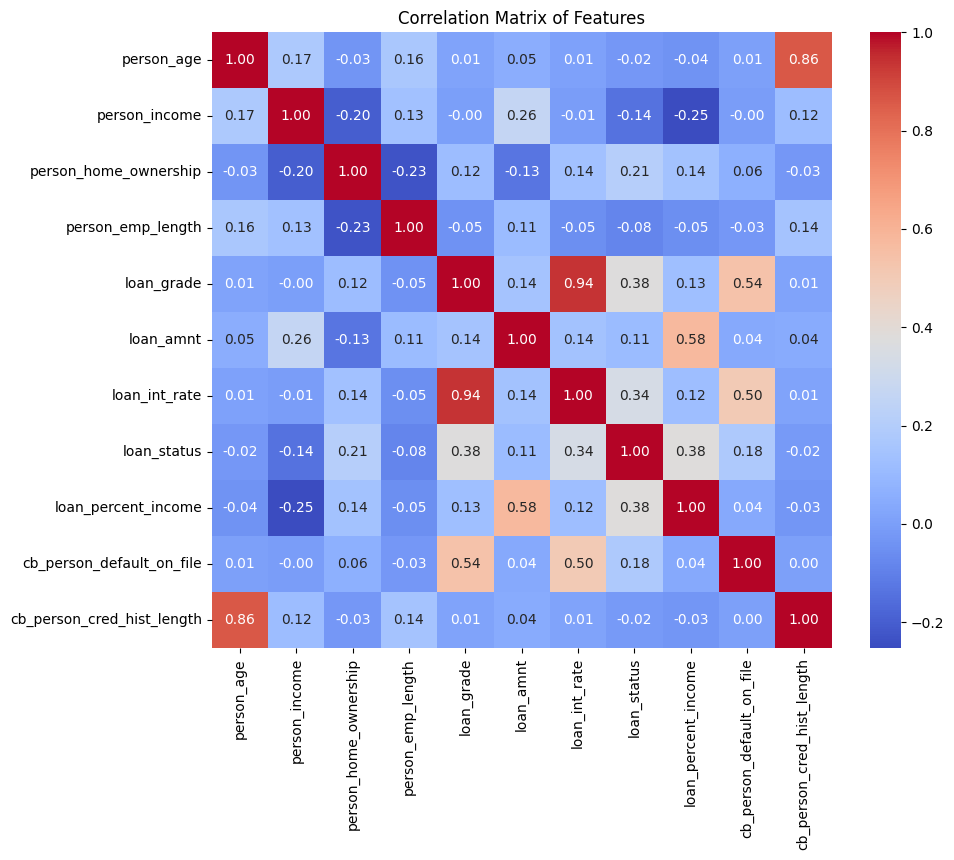

In [55]:
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

In [56]:
X = data.drop('loan_status',axis=1)
Y = data['loan_status']

In [57]:
Y

0        1
1        0
2        1
3        1
4        1
        ..
32576    0
32577    0
32578    1
32579    0
32580    0
Name: loan_status, Length: 31686, dtype: int64

In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=33)

In [59]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression

In [60]:
LReg = LogisticRegression(random_state=0)
LReg.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [61]:
# Prediction
Y_pred = LReg.predict(X_test)
 
acc = accuracy_score(Y_test, Y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)

Logistic Regression model accuracy (in %): 84.04859577153675


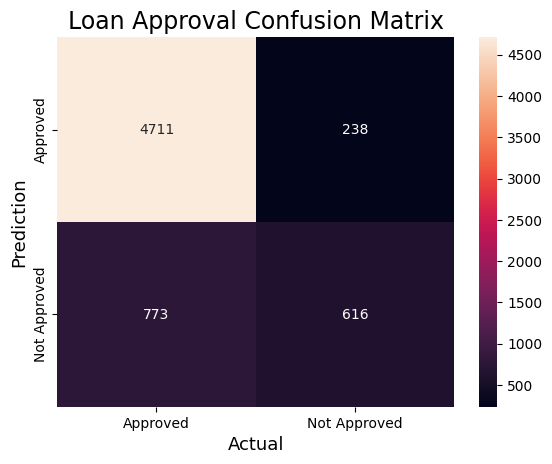

In [62]:
cm = confusion_matrix(Y_test, Y_pred)
  
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Approved','Not Approved'],
            yticklabels=['Approved','Not Approved'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Loan Approval Confusion Matrix',fontsize=17)
plt.show()

# Decision Tree

Decision Tree model accuracy (in %): 86.60460713158726
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      4949
           1       0.68      0.73      0.70      1389

    accuracy                           0.87      6338
   macro avg       0.80      0.82      0.81      6338
weighted avg       0.87      0.87      0.87      6338



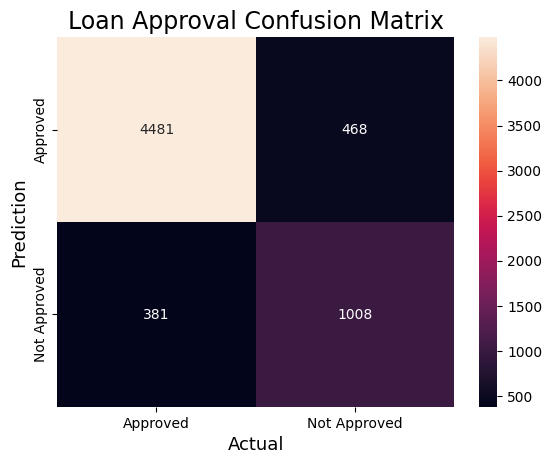

In [63]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=33)

#Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

dt_classifier.fit(X_train, Y_train)

dt_pred = dt_classifier.predict(X_test)

#Accuracy
accuracy = accuracy_score(Y_test, dt_pred)
print("Decision Tree model accuracy (in %):", accuracy*100)

#Classification report
print("Classification Report:")
print(classification_report(Y_test, dt_pred))

#Confusion matrix
cm = confusion_matrix(Y_test, dt_pred)
  
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Approved','Not Approved'],
            yticklabels=['Approved','Not Approved'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Loan Approval Confusion Matrix',fontsize=17)
plt.show()

# Random Forest

Random Forest model accuracy (in %): 90.84884821710318
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      4949
           1       0.89      0.67      0.76      1389

    accuracy                           0.91      6338
   macro avg       0.90      0.82      0.85      6338
weighted avg       0.91      0.91      0.90      6338



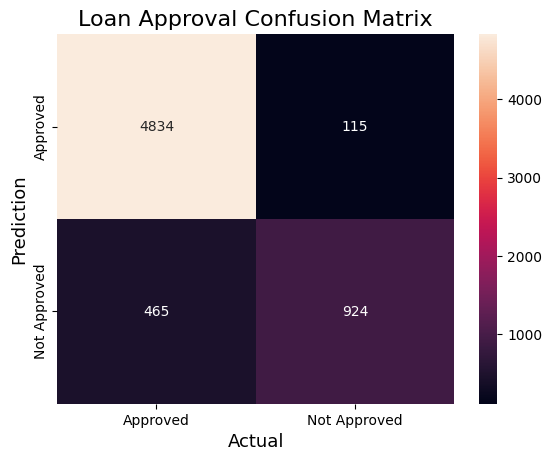

In [69]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=33)

rf_classifier = RandomForestClassifier()

rf_classifier.fit(X_train,Y_train)

rf_pred = rf_classifier.predict(X_test)

#Accuracy
accuracy = accuracy_score(Y_test, rf_pred)
print("Random Forest model accuracy (in %):", accuracy*100)

#Classification report
print("Classification Report:")
print(classification_report(Y_test, rf_pred))

#Confusion matrix
cm = confusion_matrix(Y_test, rf_pred)
  
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Approved','Not Approved'],
            yticklabels=['Approved','Not Approved'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Loan Approval Confusion Matrix',fontsize=16)
plt.show()